<h3><b>Activation Functions:</b></h3>

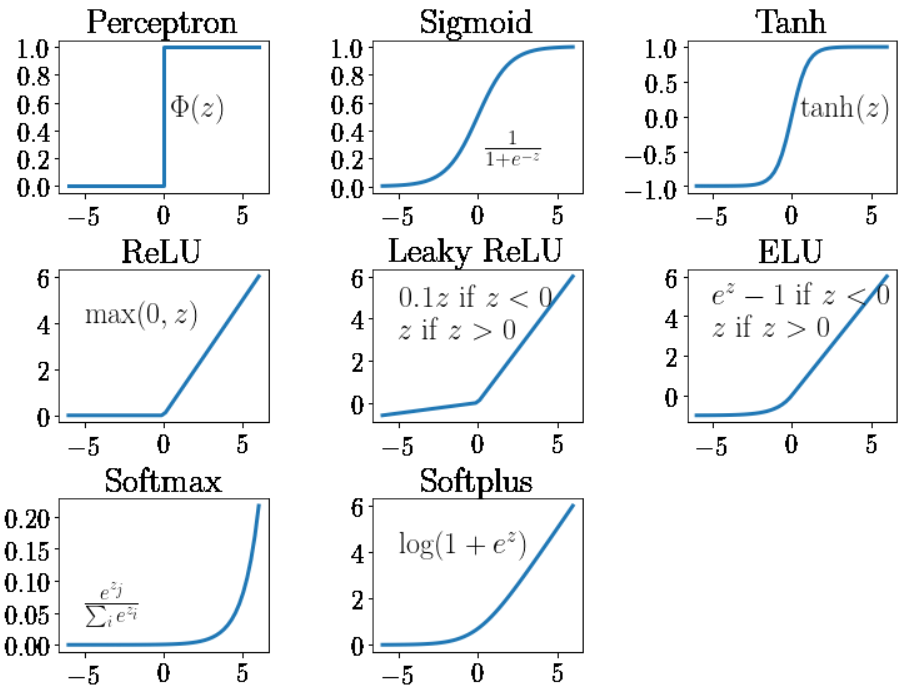

<h3><b>Single Layer Perceptron (SLP):</b></h3>

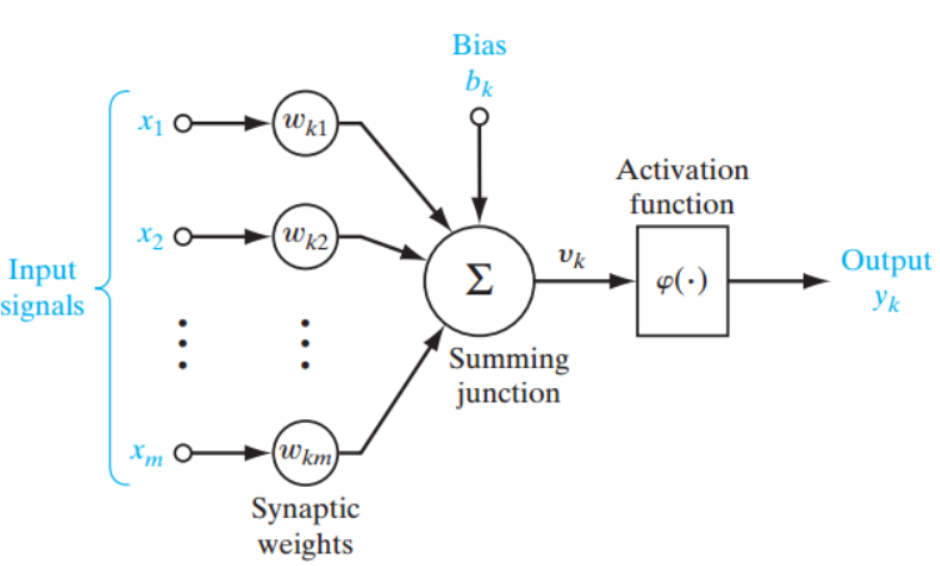

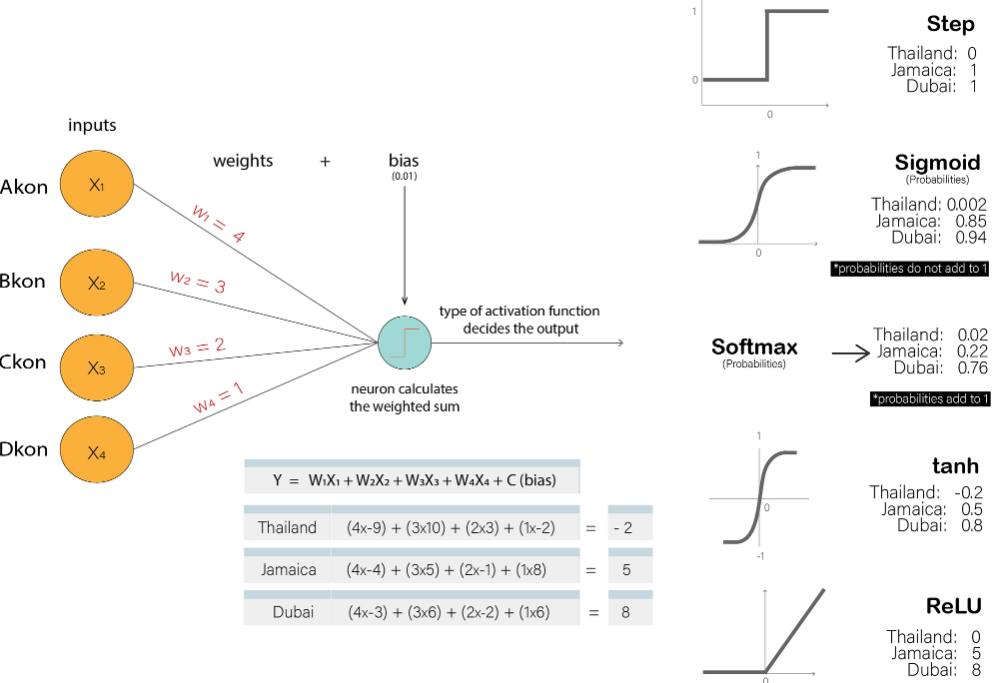

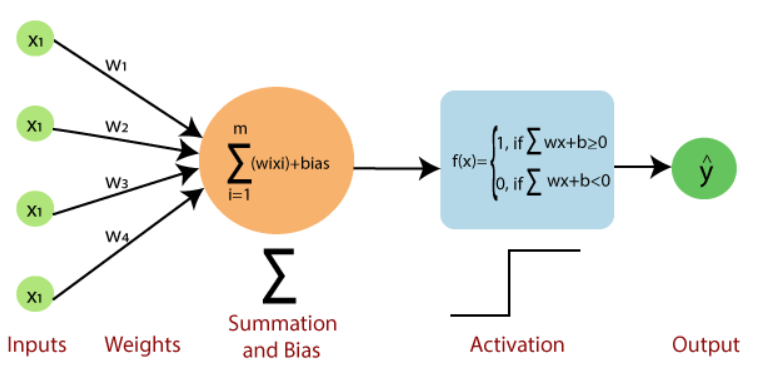

<h3><b>Multilayer Perceptron (MLP):</b></h3>

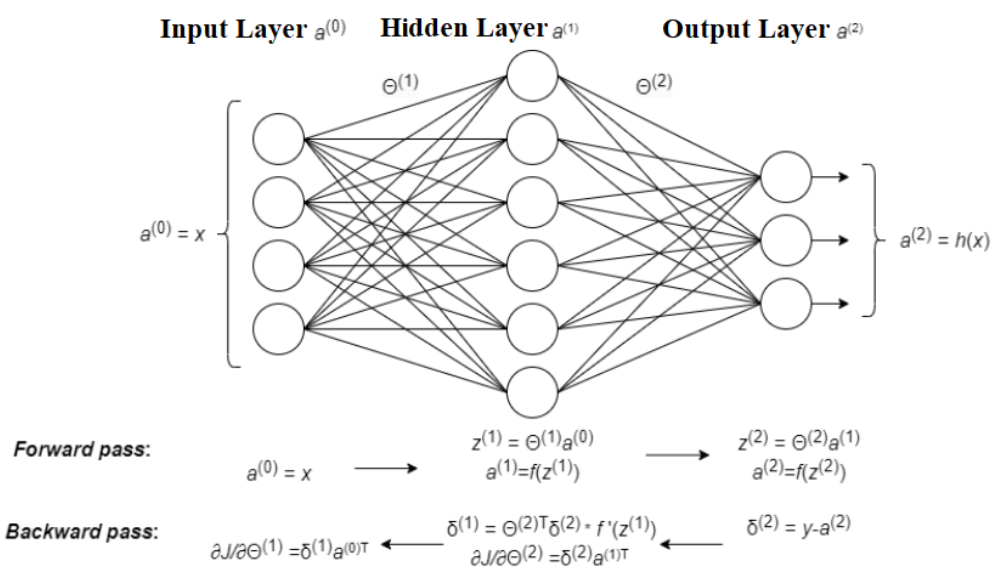

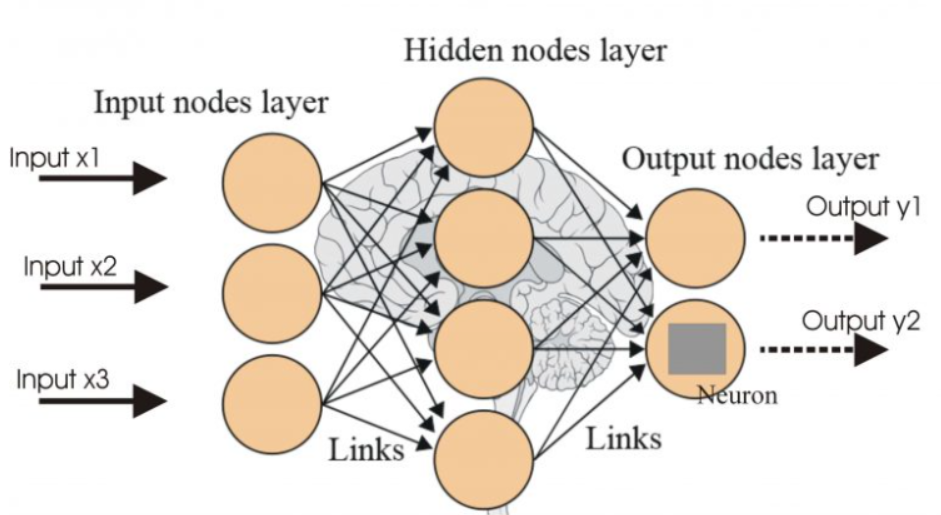

<h2><b>Output of layer: </b></h2>

\begin{equation*}
    z^{(l)} = \Theta^{(l)} \cdot a^{(l-1)}
\end{equation*}

\begin{equation*}
    a^{(l)} = f(z^{(l)})
\end{equation*}

<h2><b>Cost function: </b></h2>

\begin{equation*}
    \delta^{(l-1)} = \frac{\partial J(\Theta)}{\partial z^{(l-1)}} = (\Theta^{(l)})^T \cdot \delta^{(l)} * f'^{(l-1)} (z^{(l-1)})
\end{equation*}

\begin{equation*}
    \frac{\partial J(\Theta)}{\partial \Theta^{(l)}} = \delta^{(l)} \cdot (a^{l-1})^T
\end{equation*}

In [1]:
! python -m pip install torch==1.12.1
! python -m pip install numpy==1.22.3
! python -m pip install scikit-learn==0.24.2
! python -m pip install matplotlib==3.4.2

import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# (dla zachowania powtarzalności wyników)
np.random.seed(10) 
torch.manual_seed(10)

You should consider upgrading via the 'c:\Users\PanCh\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


  Using cached numpy-1.22.3-cp38-cp38-win_amd64.whl (14.7 MB)


You should consider upgrading via the 'c:\Users\PanCh\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\PanCh\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\PanCh\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.
c:\Users\PanCh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\PanCh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\PanCh\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<h3>1. Loading data - iris.</h3>

In [22]:
data_set = load_iris()
X_data = data_set.data
y_data = data_set.target
number_of_classes = (np.unique(y_data)).shape[0]

print(f"X data: {X_data}")
print(f"y data: {y_data}")
print(f"Number of classes: {number_of_classes}")

X data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.

<h3>2. Splitting data into training, validation and testing sets.</h3>

In [23]:
X_training_data, X_testing_data, y_training_data, y_testing_data = train_test_split(
    X_data, y_data, train_size=0.6
)

X_validation_data, X_testing_data, y_validation_data, y_testing_data = train_test_split(
    X_testing_data, y_testing_data, train_size=0.5
)

print(f"X_training_data: {X_training_data}")
print(f"Dimension of X_training_data: {X_training_data.shape}")
print(f"X_testing_data: {X_testing_data}")
print(f"Dimension of X_testing_data: {X_testing_data.shape}")
print(f"X_validation_data: {X_validation_data}")
print(f"Dimension of X_validation_data: {X_validation_data.shape}")
print(f"y_training_data: {y_training_data}")
print(f"Dimension of y_training_data: {y_training_data.shape}")
print(f"y_validation_data: {y_validation_data}")
print(f"Dimension of y_validation_data: {y_validation_data.shape}")
print(f"y_testing_data: {y_testing_data}")
print(f"Dimension of y_testing_data: {y_testing_data.shape}")

X_training_data: [[5.7 4.4 1.5 0.4]
 [6.4 2.8 5.6 2.2]
 [7.2 3.2 6.  1.8]
 [5.  2.3 3.3 1. ]
 [5.8 2.8 5.1 2.4]
 [5.1 3.5 1.4 0.3]
 [4.9 3.1 1.5 0.2]
 [5.6 2.5 3.9 1.1]
 [6.7 3.3 5.7 2.5]
 [4.6 3.2 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.2 4.1 1.5 0.1]
 [4.9 2.5 4.5 1.7]
 [5.7 3.8 1.7 0.3]
 [5.1 3.7 1.5 0.4]
 [4.4 3.2 1.3 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [5.4 3.  4.5 1.5]
 [5.  3.4 1.5 0.2]
 [6.7 3.1 4.4 1.4]
 [6.3 2.7 4.9 1.8]
 [4.9 2.4 3.3 1. ]
 [5.4 3.7 1.5 0.2]
 [6.3 2.5 4.9 1.5]
 [4.4 2.9 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.7 3.  5.2 2.3]
 [4.6 3.1 1.5 0.2]
 [6.3 2.3 4.4 1.3]
 [6.  3.4 4.5 1.6]
 [4.6 3.4 1.4 0.3]
 [5.2 3.4 1.4 0.2]
 [5.9 3.  4.2 1.5]
 [5.7 2.5 5.  2. ]
 [4.7 3.2 1.6 0.2]
 [6.4 3.2 5.3 2.3]
 [6.8 3.  5.5 2.1]
 [5.8 2.7 3.9 1.2]
 [5.1 3.8 1.5 0.3]
 [6.4 3.1 5.5 1.8]
 [6.9 3.1 5.4 2.1]
 [6.5 3.  5.8 2.2]
 [6.1 2.8 4.  1.3]
 [6.  2.2 5.  1.5]
 [6.7 3.1 4.7 1.5]
 [5.7 2.8 4.1 1.3]
 [4.8 3.  1.4 0.1]
 [4.9 3.  1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [6.3 3.4 5.6 2.4]
 [5.  3.4 1.6 

<h3>3. Standarization</h3>

In [24]:
standard_scaler = StandardScaler()
X_training_standarded_data = standard_scaler.fit_transform(X_training_data)
X_validation_standarded_data = standard_scaler.fit_transform(X_validation_data)
X_testing_standarded_data = standard_scaler.fit_transform(X_testing_data)

<h3>4. One-Hot Encoding</h3>

In [25]:
y_training_ohe = np.identity(number_of_classes)[y_training_data]
y_validation_ohe = np.identity(number_of_classes)[y_validation_data]

print(f"y training One-Hot Encoding: {y_training_ohe}")
print(f"y validation One-Hot Encoding: {y_validation_ohe}")

y training One-Hot Encoding: [[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]

<h3>5. Converting Input Data to tensors.</h3>

In [26]:
X_training_standarded = torch.tensor(X_training_standarded_data)
y_training_ohe = torch.tensor(y_training_ohe)
X_validation_standarded = torch.tensor(X_validation_standarded_data)
y_validation_ohe = torch.tensor(y_validation_ohe)
X_testing_standarded = torch.tensor(X_testing_standarded_data)

print(f"X training standarded (TENSOR): {X_training_standarded}")
print(f"y training One-Hot Encoded (TENSOR): {y_training_ohe}")
print(f"X validation standarded (TENSOR): {X_validation_standarded}")
print(f"y validation One-Hot Encoded (TENSOR): {y_validation_ohe}")
print(f"X testing standarded (TENSOR): {X_testing_standarded}")

X training standarded (TENSOR): tensor([[-0.1695,  3.1676, -1.3014, -1.0775],
        [ 0.6847, -0.5712,  1.0320,  1.2910],
        [ 1.6610,  0.3635,  1.2597,  0.7647],
        [-1.0237, -1.7396, -0.2770, -0.2880],
        [-0.0475, -0.5712,  0.7475,  1.5542],
        [-0.9017,  1.0645, -1.3584, -1.2091],
        [-1.1458,  0.1298, -1.3014, -1.3407],
        [-0.2915, -1.2722,  0.0645, -0.1564],
        [ 1.0508,  0.5972,  1.0890,  1.6858],
        [-1.5119,  0.3635, -1.3584, -1.3407],
        [ 2.2712, -0.5712,  1.6581,  1.0278],
        [-0.7797,  2.4666, -1.3014, -1.4723],
        [-1.1458, -1.2722,  0.4060,  0.6331],
        [-0.1695,  1.7655, -1.1876, -1.2091],
        [-0.9017,  1.5319, -1.3014, -1.0775],
        [-1.7559,  0.3635, -1.4153, -1.3407],
        [-0.6576,  1.5319, -1.3014, -1.3407],
        [-1.0237,  1.0645, -1.2445, -0.8144],
        [-0.5356, -0.1039,  0.4060,  0.3699],
        [-1.0237,  0.8308, -1.3014, -1.3407],
        [ 1.0508,  0.1298,  0.3491,  0.2383],
  

Layers `Linear` -> `Dropout` -> `ReLu` -> `Linear` -> `Softmax`

On the `first layer` number of neurons must match number of input data.

On the `second layer` (hidden) must be 8 neurons (chosen number).

The `last/ third layer` has three outputs that match number of classes.

6. Creating Neural Network.

In [27]:
class NeuralNet(torch.nn.Module):
    """
    Neural Network Model built from 3 layers:
    (Linear + Droput + ReLu) -> (Linear + Softmax)
    """
    def __init__(self, input_layer_size, output_layer_size, hidden_layer_size = 8):
        super().__init__()
        
        # 1. Defining input to layer.
        self.input_to_hidden = torch.nn.Sequential(
            torch.nn.Linear(
                in_features=input_layer_size, 
                out_features=hidden_layer_size
            ),
            torch.nn.Dropout(0.25),
            torch.nn.ReLU()
        )
        # 2. Defining hidden to output.
        self.hidden_to_output = torch.nn.Sequential(
            torch.nn.Linear(
                in_features=hidden_layer_size,
                out_features=output_layer_size
            ),
            torch.nn.Softmax(dim=1)
        )
        
    def forward(self, X):
        # 1. Input data are transfered to hidden input.
        X = self.input_to_hidden(X)
        # 2. Hidden data are transfered to output data.
        X = self.hidden_to_output(X)
        return X
        

<h3>Testing our <b>Neural Net</b>:</h3>

In [28]:
neural_network = NeuralNet(
    input_layer_size=X_data.shape[1], 
    output_layer_size=number_of_classes
)
neural_network = neural_network.double()
prediction = neural_network(X_validation_standarded)
print(f"Example prediction on validation data: \n{prediction[0:5]}")

Example prediction on validation data: tensor([[0.2949, 0.3300, 0.3751],
        [0.2802, 0.3133, 0.4065],
        [0.2527, 0.3529, 0.3943],
        [0.2085, 0.3388, 0.4528],
        [0.2943, 0.3027, 0.4030]], dtype=torch.float64,
       grad_fn=<SliceBackward0>)


7. Training our Neural Network.

In [29]:
def train_neural_network(
        X_training, y_training, 
        X_validation, y_validation, 
        number_of_classes, lambdA, if_plot=True
    ):
    
    neural_network = NeuralNet(
        input_layer_size=X_training.shape[1],
        output_layer_size=number_of_classes
    )
    
    neural_network = neural_network.double()
    loss_train_vector = []
    loss_validation_vector = []
    
    cost_criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(
        params=neural_network.parameters(),
        lr=0.001,           # Learning Constant.
        weight_decay=lambdA # Regularization Standard.
    )
    
    for i in range(1000):
        # Calculate evaluation cost of validation data (bias-variance trade-off). 
        if if_plot:
            neural_network.eval()
            with torch.no_grad():
                prediction = neural_network(X_validation)
                loss_validation = cost_criterion(prediction, y_validation)
                loss_validation_vector.append(loss_validation.detach().numpy())
        
        # Calculate cost on training data.
        neural_network.train()
        prediction = neural_network(X_training)
        loss_train = cost_criterion(prediction, y_training)
        loss_train.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_train_vector.append(loss_train.detach().numpy())
        
    if if_plot:
        print("NN learning ended.")
        _, ax = plt.subplots()
        ax.plot(loss_train_vector, color='red')
        ax.plot(loss_validation_vector, color='blue')
        ax.set_title("Learning curves")
        ax.set_xlabel("Iteration [-]")
        ax.set_ylabel("Cost")
        ax.legend(["Cost on traning data, Cost on walidation data"])
    return neural_network
        

8. Training and printing example prediction.

In [30]:
neural_network = train_neural_network(
    X_training=X_training_standarded,
    y_training=y_training_ohe,
    X_validation=X_validation_standarded,
    y_validation=y_validation_ohe,
    number_of_classes=number_of_classes,
    lambdA=0,
    if_plot=False
)
neural_network=neural_network.double()
prediction = neural_network(X_validation_standarded)
print(f"Example prediction on validation data: {prediction[0:5]}")

Example prediction on validation data: tensor([[1.2704e-03, 3.0022e-01, 6.9851e-01],
        [1.0622e-01, 1.7314e-01, 7.2064e-01],
        [9.8878e-01, 1.1134e-02, 8.2674e-05],
        [9.9463e-01, 5.2910e-03, 7.4599e-05],
        [5.4252e-04, 1.2629e-03, 9.9819e-01]], dtype=torch.float64,
       grad_fn=<SliceBackward0>)


In [31]:
def prediciton_neural_network(X, neural_network):
    prediction = torch.argmax(neural_network(X), dim=1)
    return prediction.detach().numpy()

In [32]:
prediction = prediciton_neural_network(X_validation_standarded, neural_network)

print(f"Example prediction on validation data: {prediction[0:5]}")

Example prediction on validation data: [2 2 0 0 2]


<h3><b>Hyperparameters tuning:<b></h3>

In [33]:
def choose_lambda(
    X_training, y_training,
    X_validation, y_validation,
    number_of_classes
):
    lambdas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
    accuracies_training = []
    accuracies_validation = []
    
    for lambdA in lambdas:
        # Creating Neural Network Model.
        neural_network = train_neural_network(
            X_training_standarded, y_training_ohe,
            X_validation_standarded, y_validation_ohe,
            number_of_classes=number_of_classes, lambdA=lambdA, if_plot=False
            )
        
        # Calculating accuracy on the training data.
        prediction_training_value = prediciton_neural_network(X_training, neural_network)
        y_training_original = np.where(y_training==1)[1]
        accuracy_training = np.mean(prediction_training_value==y_training_original)
        accuracies_training.append(accuracy_training)
        
        # Calculating accuracy on the validation data:
        prediction_validation_value = prediciton_neural_network(X_validation, neural_network)
        y_validation_original = np.where(y_validation==1)[1]
        accuracy_validation=np.mean(prediction_validation_value==y_validation_original)
        accuracies_validation.append(accuracy_validation)
    optimal_lambda = lambdas[np.argmax(accuracies_validation)]
    
    print(f"Optimal Lambda Value: {optimal_lambda}")
    _, ax = plt.subplots()
    ax.plot(lambdas, accuracies_training, color='red')
    ax.plot(lambdas, accuracies_validation, color='blue')
    ax.set_title("Lambda changes")
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Accuracy")
    ax.legend(["Accuracy on the training data", "Accuracy on the validation data"])
    
    return optimal_lambda

<h3><b>Testing creation of Neural Network and hyparameters tunining:</b></h3>

Optimal Lambda Value: 0.005
NN learning ended.


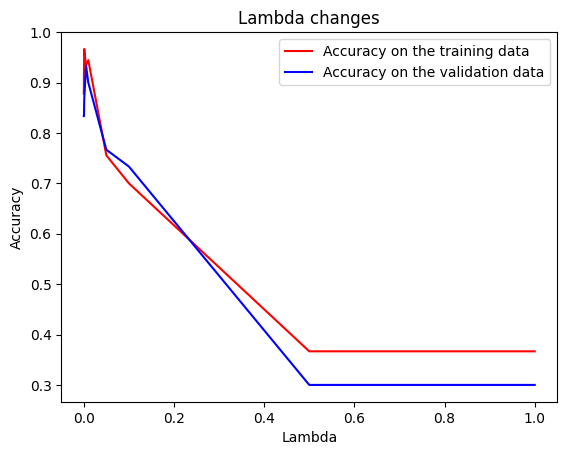

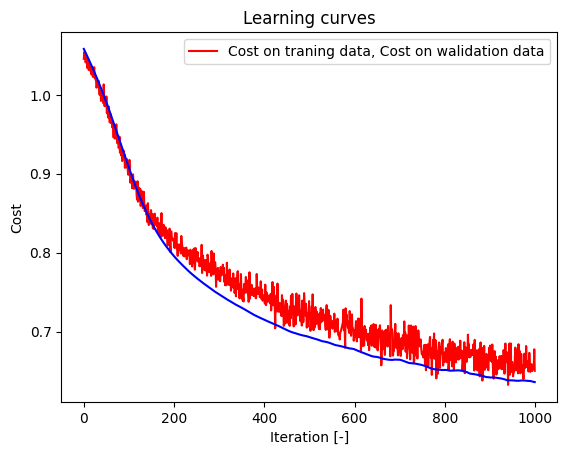

In [34]:
optimal_lambda = choose_lambda(
    X_training=X_training_standarded,
    y_training=y_training_ohe,
    X_validation=X_validation_standarded,
    y_validation=y_validation_ohe,
    number_of_classes=number_of_classes
)

neural_network = train_neural_network(
    X_training=X_training_standarded,
    y_training=y_training_ohe,
    X_validation=X_validation_standarded,
    y_validation=y_validation_ohe,
    number_of_classes=number_of_classes,
    lambdA=optimal_lambda
)

In [15]:
prediction = prediciton_neural_network(X_training_standarded, neural_network)
accuracy = np.mean(prediction==y_training_data)
print(f"Accuracy of the model on the training data: {accuracy*100} %")

prediction = prediciton_neural_network(X_validation_standarded, neural_network)
accuracy = np.mean(prediction==y_validation_data)
print(f"Accuracy of the model on the walidation data: {accuracy*100}")

prediction = prediciton_neural_network(X_testing_standarded, neural_network)
accuracy = np.mean(prediction==y_testing_data)
print(f"Accuracy of the model on the testing data: {accuracy*100}")

Accuracy of the model on the training data: 93.33333333333333 %
Accuracy of the model on the walidation data: 70.0
Accuracy of the model on the testing data: 83.33333333333334


<h3><b style="color: red">Implementation of simple Neural Network</b><h3>

1. Loading and splitting data.

In [16]:
data_set = load_iris()
X_data = data_set.data
y_data = data_set.target
number_of_classes = (np.unique(y_data)).shape[0]
X_training, Xtest, y_training, ytest = train_test_split(X_data,y_data,train_size=0.7)
X_validation, Xtest, y_validation, ytest = train_test_split(Xtest,ytest,train_size=0.5)

2. Standardization of data and One Hot Encoding.

In [17]:
standard_scaler = StandardScaler()
X_training_standarded = standard_scaler.fit_transform(X_training)
X_validation_standarded = standard_scaler.fit_transform(X_validation)
X_testing_standarded = standard_scaler.fit_transform(Xtest)

y_training_ohe = np.identity(number_of_classes)[y_training]
y_validation_ohe = np.identity(number_of_classes)[y_validation]

3. Prediction by using raw neural network.

In [18]:
def prediction_raw_neural_network(X, Theta):
    z1 = np.dot(X,Theta[0])  # Linear
    a1 = 1/(1+np.exp(-z1))   # Sigmoid
    z2 = np.dot(a1,Theta[1]) # Linear
    a2 = 1/(1+np.exp(-z2))   # Sigmoid
    a = [a1, a2]
    z = [z1, z2]
    pred = np.argmax(a2, axis=1)
    return pred, a, z

\begin{equation*}
J(\Theta) = \frac{1}{m} (\sum_{c=1}^{\textrm{num\_classes}} [-y_c \cdot \log(h_c(x)) - (1-y_c) \cdot \log(1-h_c(x))] + 
\lambda \cdot [||\Theta^{(1)}||_2 + ||\Theta^{(2)}||_2] )
\end{equation*}

\begin{equation*}
\delta^{(2)} = a^{2} - y
\end{equation*}

\begin{equation*}
\frac{\partial J(\Theta)}{\partial \Theta^{(2)}} = \frac{1}{m} (a^{(1)T} \cdot \delta^{(2)} + \lambda \Theta^{(2)})
\end{equation*}

\begin{equation*}
\delta^{(1)} = \delta^{(2)} \cdot \Theta^{(2)T} * (\textrm{sigmoid}(z^{(1)}))(1-\textrm{sigmoid}(z^{(1)})) 
\end{equation*}

\begin{equation*}
\frac{\partial J(\Theta)}{\partial \Theta^{(1)}} = \frac{1}{m} (X^T \cdot \delta^{(1)} + \lambda \Theta^{(1)})
\end{equation*}

4. Computing cost and gradient.

In [19]:
def compute_cost_and_gradient_neural_network(X_data, y_data, Theta):
    lambdA = 0.1
    Theta1 = Theta[0]
    Theta2 = Theta[1]
    _, a, z = prediction_raw_neural_network(X_data, Theta)
    a1 = a[0]
    a2 = a[1]
    z1 = z[0]
    J_cost = 0
    for c in range(y_data.shape[1]): 
        J_cost = J_cost -(np.dot(y_data[:,c],np.log2(a2[:,c]))
                          +np.dot(1-y_data[:,c],np.log2(1-a2[:,c])))/X_data.shape[0]
    J_cost = J_cost + lambdA * (np.dot(Theta1.ravel(), np.transpose(Theta1.ravel()))+ np.dot(Theta2.ravel(), np.transpose(Theta2.ravel())))/X_data.shape[0]
    d2 = a2 - y_data
    grad2 = (np.dot(np.transpose(a1),d2) + lambdA*Theta2)/ X_data.shape[0]
    d1 = np.dot(d2, np.transpose(Theta2)) * 1/(1+np.exp(-z1)) * (1-1/(1+np.exp(-z1)))
    grad1 = (np.dot(np.transpose(X_data), d1) + lambdA*Theta1) / X_data.shape[0]
    grad = [grad1, grad2]
    return J_cost, grad

5. Training raw neural network.

In [35]:
def train_raw_neural_network(X_training, y_training, X_validation, y_validation, number_of_classes):
    hidden_layer_size = 8
    alpha = 0.05
    number_of_iterations = 1000
    Theta1 = 2 * np.random.random(size=(X_training.shape[1], hidden_layer_size)) - 1
    Theta2 = 2 * np.random.random(size=(hidden_layer_size, number_of_classes)) - 1
    Theta = [Theta1, Theta2]
    loss_training_vector = np.zeros(number_of_iterations) 
    loss_validation_vector = np.zeros(number_of_iterations)

    for i in range(number_of_iterations): 
        J_traininng_cost, grad = compute_cost_and_gradient_neural_network(X_training, y_training, Theta)
        J_validation_cost, _ = compute_cost_and_gradient_neural_network(X_validation, y_validation, Theta)
        
        for j in range(len(Theta)): 
            Theta[j] = Theta[j]-alpha*grad[j] 
            
        loss_training_vector[i] = J_traininng_cost
        loss_validation_vector[i] = J_validation_cost

    print("Model learning finished")
    _, ax = plt.subplots()
    ax.plot(loss_training_vector, color='blue')
    ax.plot(loss_validation_vector, color='black')
    ax.set_title("Learning Curves")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Cost")
    ax.grid("True")
    ax.legend(["Cost on training", "Cost on validation data"])
    return Theta

6. Training and predicting values

Model learning finished
Model accuracy on the traning data: 90.47619047619048%
Model accuracy on the validation data: 90.9090909090909%
Model accuracy on the testing data: 91.30434782608695%


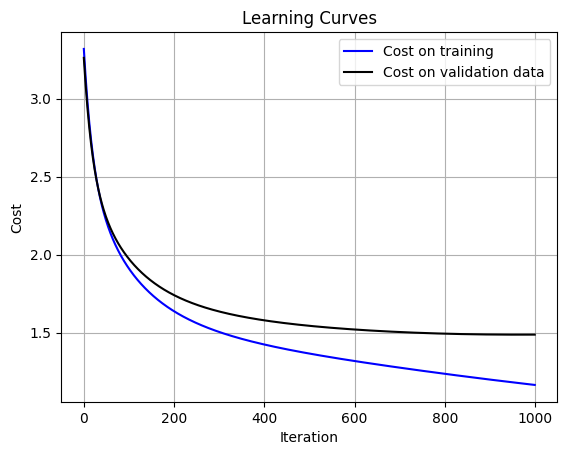

In [21]:
Theta = train_raw_neural_network(
    X_training=X_training_standarded, 
    y_training=y_training_ohe, 
    X_validation=X_validation_standarded, 
    y_validation=y_validation_ohe, 
    number_of_classes=number_of_classes
    )

prediction, _, _ = prediction_raw_neural_network(X_training_standarded, Theta)
accuracy = np.mean(prediction==y_training)
print("Model accuracy on the traning data: "+str(accuracy*100)+'%')

prediction, _, _ = prediction_raw_neural_network(X_validation_standarded, Theta)
accuracy = np.mean(prediction==y_validation)
print("Model accuracy on the validation data: "+str(accuracy*100)+'%')

prediction, _, _ = prediction_raw_neural_network(X_testing_standarded, Theta)
accuracy = np.mean(prediction==ytest)
print("Model accuracy on the testing data: "+str(accuracy*100)+'%')

## 5. Pytania kontrolne

<h4>1. Jaka jest rola funkcji aktywacji na każdej warstwie sieci neuronowej?</h4>

odp.: Zastosowanie nieliniowej funkcji aktywacji pozwala sieciom neuronowym rozwiązywać skomplikowane przy pomocy mniejszej liczby neuronów oraz przyśpiesza uczenia sieci. Najbardziej popularnymi są:
- `sigmoidalna`,
- `Gaussa`,
- `Sinusoidalna`,
- `Skokowa`,

Według niej obliczana jest wartość wyjścia neuronów sieci neuronowej.

W wyniku agregacji danych wejściowych z uwględnieniem wag powstaje <b style="color:red">sygnał sumarycznego pobudzenia.</b> Innymi słowy, funkcja aktywacji polega na tym, że musi ona określić sposób obliczenia wartości sygnału wyjściowego neuronu na podstawie wartości tego sumarycznego pobudzenia.

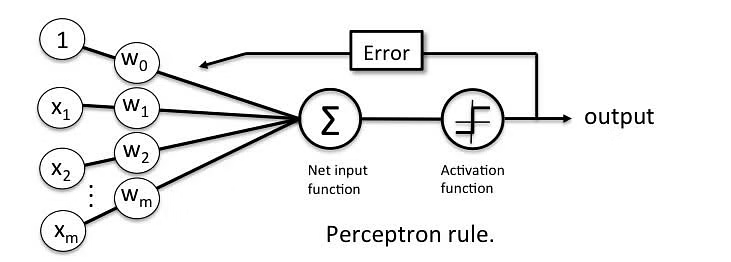

<h4>2. Opisz krótko, na czym polega propagacja wsteczna (w odniesieniu do treningu sieci neuronowej).</h4>

Propagacja wsteczna polega na szukaniu kierunku spadku przez takie zmienianie wartości wag (Q), żeby zmniejszyć wartość funkcji błędu w kierunku najszybszego spadku. Innymi słowy, jest to metoda umożlwiająca modyfikację wag w sieci o architekturze sieci.

<b>Ogólny schemat procesu trenowania sieci:</b>
1. Ustalamy topologię sieci, tzn. liczbę warstw, liczbę neuronów w warstwach.
2. Inicjujemy wagi losowo.
3. Dla danego wektora uczącego obliczamy odpowiedź sieci (warstwa po warstwie).
4. Każdy neuron wyjściowy oblicza swój błąd, oparty na różnicy pomiędzy obliczoną odpowiedzią y oraz poprawną odpwiedzią t.
5. Błędy propagowane są do wcześniejszych warstw.
6. Każdy neuron (również w warstwach ukrytych) modyfikuje wagi na podstawie wartości błędu i wielkosci przetwarzanych w tym kroku sygnałów.
7. Powtarzamy od punktu 3. dla kolejnych wektorów uczących. Gdy wszystkie wektory zostaną użyte, losowo zmieniamy ich kolejność i zaczynamy wykorzystywać powtórnie.
8. Zatrzymujemy się, gdy średni błąd na danych treningowych przestanie maleć. Możemy też co jakiś czas testować sieć na specjalnej puli nieużywanych do treningu próbek testowych i kończyć trenowanie, gdy błąd przestanie maleć.

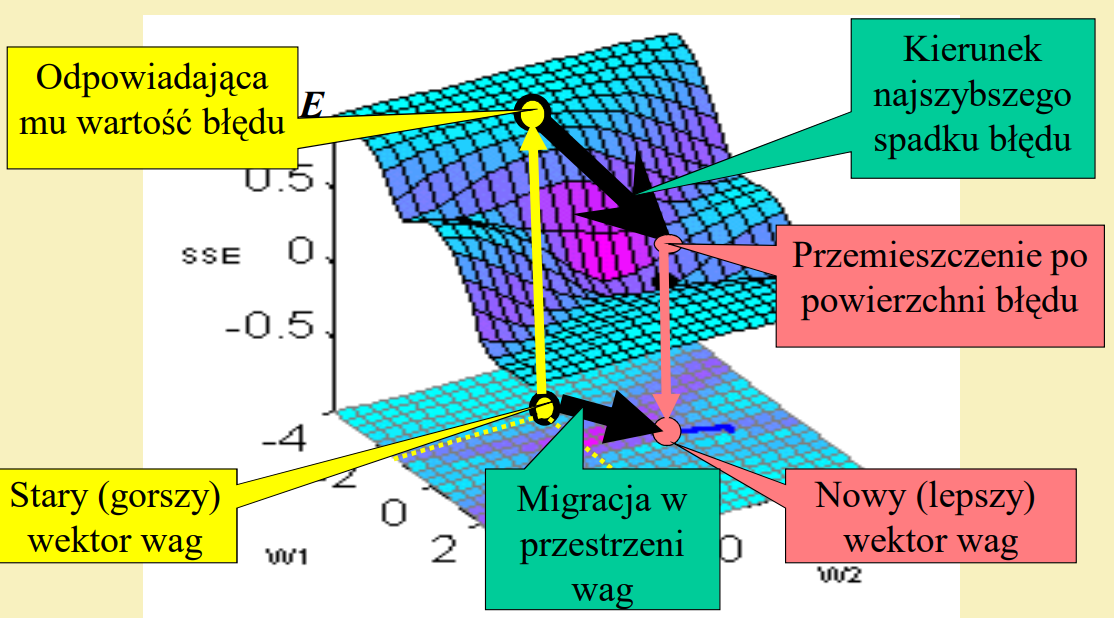

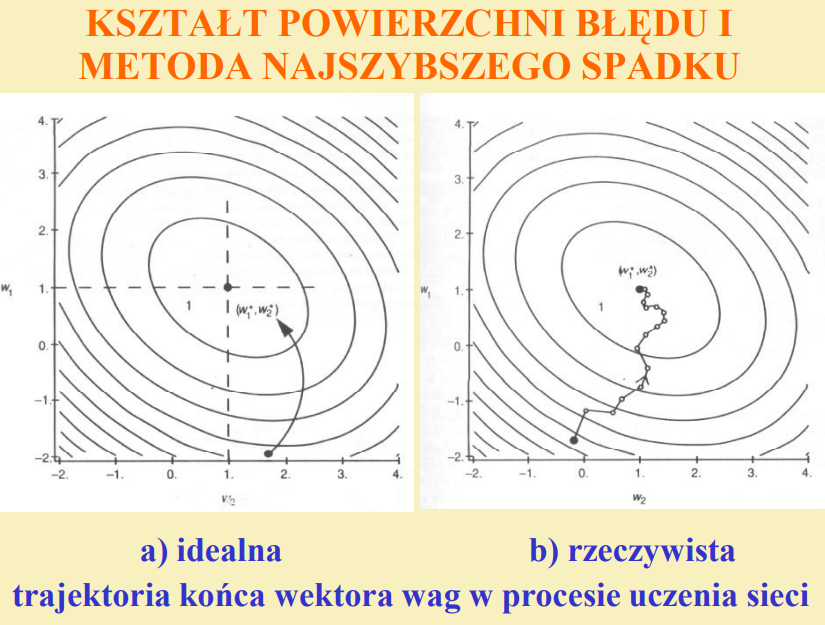

<h4>3. Czym jest przeuczenie modelu? Wymień znane Ci techniki, które mu przeciwdziałają.</h4>

Przeuczenie modelu polega zbyt ogólny lub dokładnym dostosowaniu modelu (wag) do problemu. Im bardziej ogólny tym większy `bias`, skomplikowany/ złożony to `wariancja`.

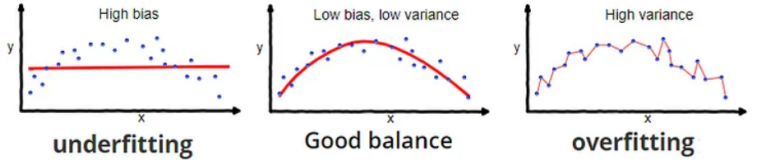

Możemy prowadzić walkę z przeuczeniem przy użyciu technik:
- `regularyzacji`,
- funkcja kosztu MSE z regularyzacją,
- funkcja kosztu BCE z regularyzacją,
- Gradient z regularacyzacją,
- `dropout`,
- `batchnorm`,